In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# Since matrix R contains the single non-zero element n in position J, J
# the product of A* and R is the matrix having at the J column the J row
# from matrix A multiplied by n (let's denote this vector as c), and zeroes in all other places
# The final product 2 A* R (Ax - b) will be 2 * c * (Ax - b)[J]
# Now, (Ax - b)[J] is (dot product of A[J] and x) - b[J]
# The computational cost of this operation is O(n)


In [3]:
def solve():
    print('Exact solution:')
    print(np.linalg.solve(A, b))
    # initialize x and g with random values from -1 to 1
    x = (np.random.rand(n) - 0.5) * 2.
    g = (np.random.rand(n) - 0.5) * 2.
    norm = np.linalg.norm(g, 2)
    sample_size = 100
    iteration_count = 0
    # if iteration_count exceeds 1,000,000 we consider the process divergent
    x_ticks = []
    x_vals = []
    while norm > 0.001 and iteration_count < 1000000:
        iteration_count += 1
        for _ in range(sample_size):
            J = random.randrange(0, n)
            g += 2 * A[J] * n * (np.dot(A[J], x) - b[J])
        g = g / sample_size
        x = x - epsilon * g
        norm = np.linalg.norm(g, 2)
        if iteration_count % 500 == 0:
            # print('count', iteration_count, 'norm', norm)
            x_ticks.append(iteration_count)
            x_vals.append(norm)
    print('Calculated solution')
    print(x)
    print('\n\nnorm: ', norm, 'total iterations:', iteration_count)
    plt.xlabel('iterations')
    plt.ylabel('norm')
    plt.title(f'matrix size {n}')
    plt.plot(x_ticks, x_vals)
    plt.show()

In [4]:
# Populate the matrix with the random independent Gaussian entries with mean 0 and variance 1/n
def randomly_populate_matrix():
    for i in range(n):
        for j in range(n):
            A[i, j] = np.random.normal(0, np.sqrt(1 / n))

In [5]:
# Set the globals for the run. Note that we set epsilon 1 / s^2 where s is the largest eigenvalue
def set_globals(_n):
    global n
    global A
    global b
    n = _n
    A = np.empty([n, n])
    randomly_populate_matrix()
    b = np.empty(n)
    b.fill(0)
    b[0] = 1
    eigvals = np.linalg.eigvals(np.matmul(A.transpose(), A))
    maximal_eigval = eigvals.max()
    global epsilon
    epsilon = 1 / (maximal_eigval ** 2)
    print('maximal_eigval', maximal_eigval)
    print('epsilon', epsilon)

maximal_eigval 4.203140204268404
epsilon 0.05660466779958849
Exact solution:
[-0.58866092 -0.8423886  -0.59081346 -0.24990995 -1.75359838 -1.08425089
 -0.86038327 -0.56962339 -0.05059327 -0.75578749]
Calculated solution
[-0.58092847 -0.82979407 -0.52448744 -0.24845588 -1.71289443 -1.10146568
 -0.86627658 -0.55212545 -0.11299926 -0.70569447]


norm:  0.0009742482786445063 total iterations: 4974


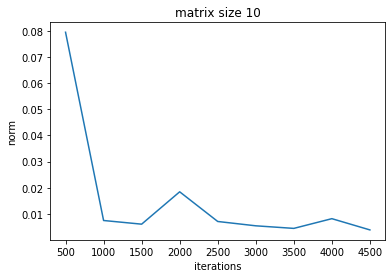

In [6]:
# Now lets verify that our algorithm works correctly. To do this, lets run it for randomly populated matrices
# of various order and compare with the numpy built in solutuin
set_globals(10)
solve()

maximal_eigval 3.265092069901177
epsilon 0.09380136012923525
Exact solution:
[ 0.1961635  -1.39229341  0.26518897 -0.15652868  0.40345359  1.31194532
  0.13622072 -0.13194248  0.62287547 -0.88548435  1.23479922  1.27179637
 -0.54793031  0.47084317  0.05092408 -0.38555106  0.37795332  0.26613703
  0.90979574 -0.5294381 ]
Calculated solution
[ 0.19901895 -1.40150251  0.2455466  -0.16061624  0.40229545  1.30981907
  0.12502989 -0.15654824  0.62543756 -0.86827962  1.22482618  1.27241862
 -0.55058601  0.45827966  0.06243395 -0.3977086   0.37229711  0.26642588
  0.90444977 -0.53468054]


norm:  0.0009646020891839304 total iterations: 6707


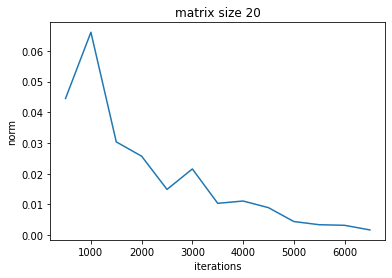

In [7]:
set_globals(20)
solve()

maximal_eigval 3.379565596942305
epsilon 0.08755445299458306
Exact solution:
[  3.48887371   9.4685188   -0.80085705   1.86824615  10.33496642
  -1.11742291  -1.04678387  -0.14944127  -0.60378015   0.71278039
  -1.5666642    7.52209033  -4.43525058  -1.24503401   6.26888378
   7.82655829   0.90411006  10.29777172  -1.32979012   3.31524619
   5.03423453   0.61007882   5.94048405 -15.88512541   3.58375573
  -2.17285975  -2.67591866   3.29227325  -5.37104526  -3.03505808]
Calculated solution
[  3.45789021   9.39300331  -0.79024329   1.84955602  10.25190435
  -1.10628466  -1.04970546  -0.15717438  -0.59837897   0.71016288
  -1.5460533    7.45634561  -4.39701843  -1.23147103   6.21764043
   7.75517047   0.90775204  10.20982375  -1.31639867   3.28732732
   4.99241543   0.60668798   5.89043751 -15.75153227   3.55528569
  -2.15454754  -2.65655854   3.25589357  -5.32125409  -3.00548254]


norm:  0.0009304622898686539 total iterations: 343745


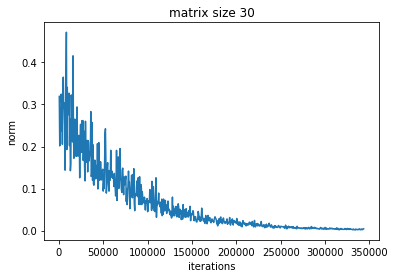

In [8]:
set_globals(30)
solve()

In [ ]:
set_globals(100)
solve()

maximal_eigval 3.900196858954313
epsilon 0.06573958279640103
Exact solution:
[ 2.03635336  0.35656442  1.42984337  2.60689871  6.73632185 -1.96164517
 -2.83870227 -1.70196931  0.68335838 -0.22347642  2.08575038 -3.91825408
  0.12107588  1.71670374  1.96284255 -2.91745197 -1.58436922 -0.16653263
 -3.88293263  0.91205743 -3.84871383  0.43047252  2.37322084 -1.47073686
 -0.64058725  3.58724279 -3.62185721 -1.79618184 -0.64588341 -1.406946
 -1.04003377 -1.96334266  2.69729913 -1.44900768 -2.02404643 -1.77561979
  1.12583789 -3.82303901  3.45501188  3.25204675  0.65677592 -2.62254261
  1.8814776   2.54750543 -0.38641292  1.3314505  -2.02204136 -2.06847412
  3.65680167  3.38062833  0.85186853 -1.22583135 -3.49113912  1.24768086
 -0.1607962  -1.29603898  1.42830901  0.74133739  2.23467957 -1.40282482
  2.10088199  1.55087761 -2.05148885  0.22966577  2.37061882 -0.61459079
 -0.26088007  0.65244773 -1.76391512 -1.65378735  2.15935808  0.95356425
 -1.4876208   1.69952089  0.57084171  2.96196713 

In [ ]:
set_globals(500)
solve()

In [ ]:
# We see that the algorithm works. Please note, we selected epsilon = 1/s^2, where s is the largest eigenvalue, 
# just like in regular Jacobi iteration
